In [ ]:
import sys
sys.path.append("..")
import keras
import nn
from layers import ReLu, Dense
import matplotlib.pyplot as plt
import random

def load_data():
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    x_train = x_train.astype(float) / 255.
    x_test = x_test.astype(float) / 255.

    x_train = x_train.reshape([x_train.shape[0], -1])
    x_test = x_test.reshape([x_test.shape[0], -1])

    return x_train, y_train, x_test, y_test


x_train, y_train, x_test, y_test = load_data()


In [2]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [4]:
network = nn.SimpleNn()
network.add(Dense(x_train.shape[1], 150))
network.add(ReLu())
network.add(Dense(150, 250))
network.add(ReLu())
network.add(Dense(250, 10))


def callback(epoch, train_accuracy, val_accuracy, loss):
    print("Epoch %d" % epoch)
    print("Train accuracy: %.2f, Validation accuracy: %.2f, Loss: %.2f" % (train_accuracy, val_accuracy, loss))
    
    
network.fit(x_train, y_train, x_test, y_test, 10, 32, True, [callback])

Epoch 0
Train accuracy: 0.94, Validation accuracy: 0.94, Loss: 0.65
Epoch 1
Train accuracy: 0.97, Validation accuracy: 0.96, Loss: 0.16
Epoch 2
Train accuracy: 0.98, Validation accuracy: 0.97, Loss: 0.10
Epoch 3
Train accuracy: 0.98, Validation accuracy: 0.96, Loss: 0.08
Epoch 4
Train accuracy: 0.99, Validation accuracy: 0.98, Loss: 0.06
Epoch 5
Train accuracy: 0.99, Validation accuracy: 0.97, Loss: 0.05
Epoch 6
Train accuracy: 0.99, Validation accuracy: 0.98, Loss: 0.04
Epoch 7
Train accuracy: 0.99, Validation accuracy: 0.98, Loss: 0.03
Epoch 8
Train accuracy: 0.99, Validation accuracy: 0.98, Loss: 0.03
Epoch 9
Train accuracy: 0.99, Validation accuracy: 0.97, Loss: 0.02


In [6]:
history = network.history
loss = history.loss
train_acc = history.train_accuracy
val_acc = history.val_accuracy

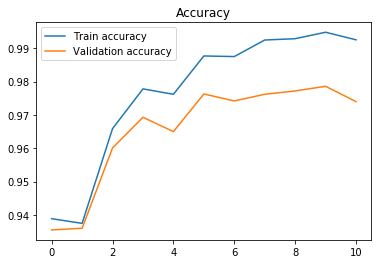

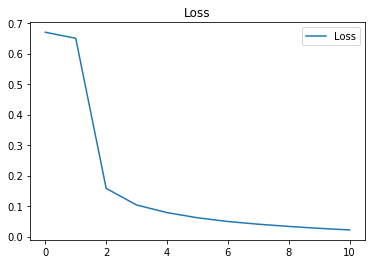

In [14]:
plt.plot(train_acc, label='Train accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.legend(loc='best')
plt.title("Accuracy")
plt.show()

plt.plot(loss, label='Loss',)
plt.legend()
plt.title("Loss")
plt.show()

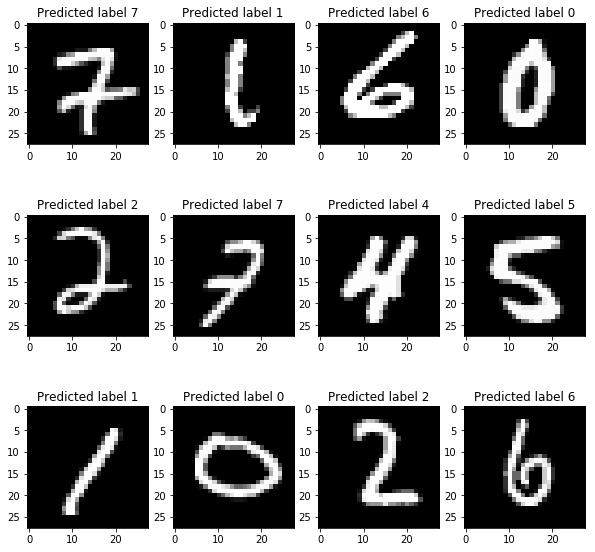

In [28]:
import random
sample_idx = random.sample(range(len(x_test)), 12)
samples = x_test[sample_idx]
predicted_labels = network.predict(samples)

plt.figure(figsize=[10,10])
for i in range(12):
    sample = samples[i]
    plt.subplot(3,4,i+1)
    plt.title('Predicted label %d' % predicted_labels[i])
    plt.imshow(sample.reshape((28,28)), cmap='gray')

In [30]:
from sklearn.metrics import confusion_matrix

y_test_predicted = network.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_test_predicted)
print(conf_matrix.shape)

(10, 10)


In [105]:
import numpy as np

def plot_conf_matrix(conf_matrix):
    conf_matrix = conf_matrix.astype('float')/conf_matrix.sum(axis=1)
    classes = range(conf_matrix.shape[0])
    
    plt.figure(num=0, figsize=(8, 8))
    for i,j in zip(classes, classes):
        plt.text(i, j, format(conf_matrix[i,j], '.2f'), horizontalalignment='center', 
                 color='white', verticalalignment='center')
    plt.title("Confusion Matrix")
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.show()

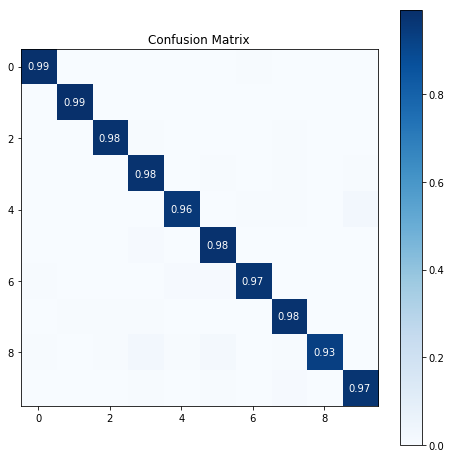

In [106]:
plot_conf_matrix(conf_matrix)